In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import binom

In [7]:
#hay una ruleta en un casino, la ruleta tiene 18 espacios rojos y 18 espacios negros y 2 verdeds
#al girar la ruleta si sale rojo el apostador gana 1 dolar, si sale negro pierde
#desde la vista del casino si sale rojo el casino pierde un dolar, si sale negro el casino gana 1 dolar, si sale verde el casino gana un dolar
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2
giradas = [random.choice(ruleta) for _ in range(1000)]
#resultados
df= pd.DataFrame({"giradas":giradas})
resultados = df["giradas"].value_counts()
gana_casino = (resultados.get("verde",0) + resultados.get("negro",0))
pierde_casino = resultados.get("rojo",0)*-1
ganacia_final = gana_casino + pierde_casino
print(resultados)
print(f"gana casino:", gana_casino)
print(f"pierde casino:", pierde_casino)
print(f"ganacia final:", ganacia_final)

giradas
rojo     493
negro    460
verde     47
Name: count, dtype: int64
gana casino: 507
pierde casino: -493
ganacia final: 14


In [17]:
#funcion para giro de ruleta
def roulete_spin(spins=1000, roulete=ruleta):
    earnings = 0
    for _ in range(spins):
        result = random.choice(roulete)
        if result == "rojo":
            earnings -= 1
        else:
            earnings += 1
    return earnings
roulete_spin()

10

In [31]:
# sampling model
samplings = []
for _ in range(10000):
    samplings.append(roulete_spin()) #lista donde se almacenan los resultados 


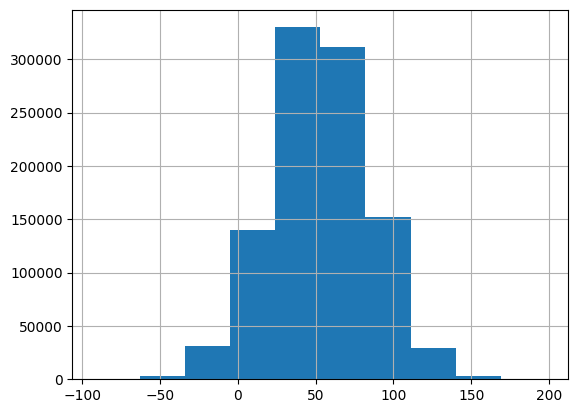

In [32]:
#plot histograma de frecuencias
plt.hist(samplings)
plt.grid(True)
plt.show()

In [34]:
#desviCION ESTANDAR
std=np.std(samplings)
std

np.float64(31.583759128028813)

In [36]:
n = len(samplings) #TAMAÑO DE LA MUESTRA
n

1000000

In [37]:
#ERROR ESTANDAR
std/np.sqrt(n)

np.float64(0.03158375912802881)

##probabilidad bernoulli
#La distribución de Bernoulli es una distribución de probabilidad discreta que describe una variable aleatoria que puede tomar dos posibles valores: 1 (éxito) con probabilidad 𝑝  y 0 (fracaso) con probabilidad 1−𝑝.
#probabilidad bernoulli es por ejemplo un lanzamiento de una moneda conde "p" es cara = 0.5 y "-p" cruz = 0.5 E[X]=0.5, VAR[X]=0.25
#otro ejemplo es obtener 5 o 6 en un lanzamiento de dado donde p= 2/6  ; -p= 4/6
#el valor esperado E[X] es "p" y la varianza VAR[x]=p*(1-p)


#Distribucion binomial es una distribucion de probabilidad discreta del numero de exitos en una secuencia de "n" experimentos independientes Bernulli 
#exito tiene probabilidad "p" y el fracaso tiene probabilidad "-p"
#un ejemplo es la probabilidad de sacar 3 aras en un lanzamiento de 4 monedas, cada lanzamiento de moneda es un evento bernulli independiente de los otros lanzamientos

$ P(X=k) = {n\choose k} p^k*(1-p)^{n-k} $

${n\choose k} n!/(k!*n-k!)$

$n!=n*(n-1)*(n-2)...*1$

#el valor esperado de la distribucion binomial E[C]=n * p y la varianza es VAR[x]=n * p * (1-p)


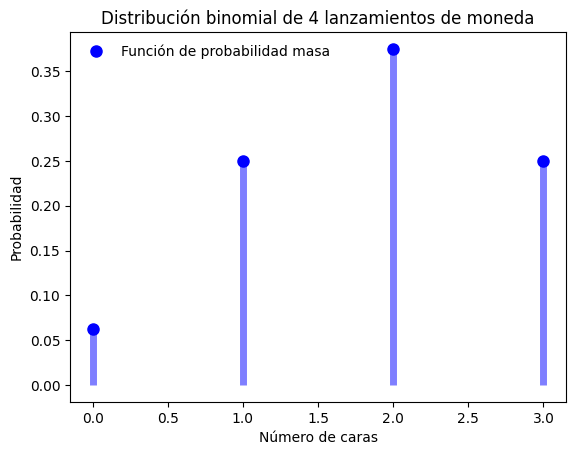

In [39]:
#Existe un evento "n" que es la probabilidad de sacar 3 caras en un lanzamiento de 4 monedas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
# Parámetros de la distribución binomial
n, p = 4, 0.5  # Número de ensayos y probabilidad de éxito
# Crear un objeto binomial
rv = binom(n, p)
# Crear la figura y el eje
fig, ax = plt.subplots(1, 1)
# Generar los valores de x
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
# Graficar la PMF
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Función de probabilidad masa')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
# Añadir etiquetas y título
ax.legend(loc='best', frameon=False)
ax.set_xlabel('Número de caras')
ax.set_ylabel('Probabilidad')
ax.set_title('Distribución binomial de 4 lanzamientos de moneda')
# Mostrar el gráfico
plt.show()


## La distribución Poisson es una distribucion de probabilidad discreta que expresa la probabilidad de que un numero dado de eventos ocurra en un intervalo fijo de tiempo a una tasa media constante (lambda)

$$ P(X=k) =\frac{\lambda^k * e^-{\lambda}}{k!}$$

## el valor esperado de E[X] es igual a lambda y la varianza VAR[X] es igual a lambda 

## La disribucion normal es una distribucion de probabilidad continua para una variable aleatorio en el espacio continuo y esta representada por su media $\mu$ y su desviacion estandar $\sigma$

$$ P(X=\mu\sigma) = \frac {1}{\sqrt{2\pi\sigma^2}} * e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$

El valor esperado E[X] es $\mu$ y la varianza VAR[X] es $\sigma^2$